### Application of KNN Classifier on breast cancer dataset

**Problem Statement: To train a machine learning model for breast cancer detection using
KNN.**

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the data

In [2]:
df = pd.read_csv('Datasets/breastcancer.csv')
df.head()

,id number,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Exploratory Data Analysis

In [3]:
df.describe()

,id number,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id number             699 non-null    int64 
 1   Clump_Thickness       699 non-null    int64 
 2   Cell_Size             699 non-null    int64 
 3   Cell_Shape            699 non-null    int64 
 4   Marginal_Adhesion     699 non-null    int64 
 5   Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei           699 non-null    object
 7   Bland_Chromatin       699 non-null    int64 
 8   Normal_Nucleoli       699 non-null    int64 
 9   Mitoses               699 non-null    int64 
 10  Class                 699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
df.shape

(699, 11)

In [6]:
df.columns

Index(['id number', 'Clump_Thickness', 'Cell_Size', 'Cell_Shape',
       'Marginal_Adhesion', 'Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [7]:
df.dtypes

id number                int64
Clump_Thickness          int64
Cell_Size                int64
Cell_Shape               int64
Marginal_Adhesion        int64
Epithelial_Cell_Size     int64
Bare_Nuclei             object
Bland_Chromatin          int64
Normal_Nucleoli          int64
Mitoses                  int64
Class                    int64
dtype: object

In [8]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

'Class' is the target variable in this dataset. It comprises of 2 values: '2', which denotes the presence if a benign tumour, and '4', which denotes the presence of a malignant tumour.

**Checking for null values**

In [9]:
df.replace(['?', ' '], np.nan, inplace=True)

In [10]:
df.isnull().sum()

id number                0
Clump_Thickness          0
Cell_Size                0
Cell_Shape               0
Marginal_Adhesion        0
Epithelial_Cell_Size     0
Bare_Nuclei             16
Bland_Chromatin          0
Normal_Nucleoli          0
Mitoses                  0
Class                    0
dtype: int64

The variable 'Bare_Nuclei' in the dataset contains 16 null values, which need to be dropped in order to present a cleaned dataset for the next stage of model building.

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

id number               0
Clump_Thickness         0
Cell_Size               0
Cell_Shape              0
Marginal_Adhesion       0
Epithelial_Cell_Size    0
Bare_Nuclei             0
Bland_Chromatin         0
Normal_Nucleoli         0
Mitoses                 0
Class                   0
dtype: int64

**Heatmap for correlation**

In [13]:
df.drop('id number', axis=1, inplace=True)

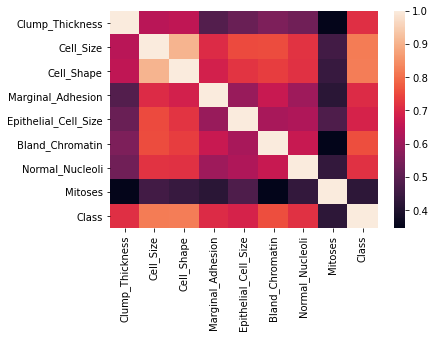

In [14]:
sns.heatmap(df.corr())

- The target variable 'Class' has a high linear dependency with the independent variables 'Cell_Size' and 'Cell_Shape'.
- The variable 'Mitoses' has the least effect on the outcome of the target variable.

### Standardization

Since the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations than those on a smaller scale. Hence, standardizing the variables is an important step.

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
new = df.drop('Class',axis=1)
new['Bare_Nuclei'] = pd.to_numeric(new['Bare_Nuclei'])
new.head()

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [18]:
new.dtypes

Clump_Thickness         int64
Cell_Size               int64
Cell_Shape              int64
Marginal_Adhesion       int64
Epithelial_Cell_Size    int64
Bare_Nuclei             int64
Bland_Chromatin         int64
Normal_Nucleoli         int64
Mitoses                 int64
dtype: object

In [19]:
scaler.fit(new)

StandardScaler()

In [20]:
scaled_features = scaler.transform(new)
scaled_features

array([[ 0.19790469, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       [ 0.19790469,  0.27725185,  0.26278299, ..., -0.18182716,
        -0.28510482, -0.34839971],
       [-0.51164337, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       ...,
       [ 0.19790469,  2.23617957,  2.2718962 , ...,  1.86073779,
         2.33747554,  0.22916583],
       [-0.15686934,  1.58320366,  0.93248739, ...,  2.67776377,
         1.02618536, -0.34839971],
       [-0.15686934,  1.58320366,  1.6021918 , ...,  2.67776377,
         0.37054027, -0.34839971]])

In [23]:
scaled_features.shape

(683, 9)

In [21]:
df_scaled = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_scaled.head()

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484


### Train-Test split

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features,df['Class'],test_size=0.3, random_state=42)

### Finding the optimal value of k

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
error_rate = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    
error_rate

[0.06341463414634146,
 0.07317073170731707,
 0.03414634146341464,
 0.05853658536585366,
 0.04390243902439024,
 0.04878048780487805,
 0.03902439024390244,
 0.04878048780487805,
 0.03902439024390244,
 0.04390243902439024,
 0.03902439024390244,
 0.04878048780487805,
 0.04390243902439024,
 0.04878048780487805,
 0.03902439024390244,
 0.04390243902439024,
 0.04390243902439024,
 0.04878048780487805,
 0.04390243902439024]

Text(0, 0.5, 'Error Rate')

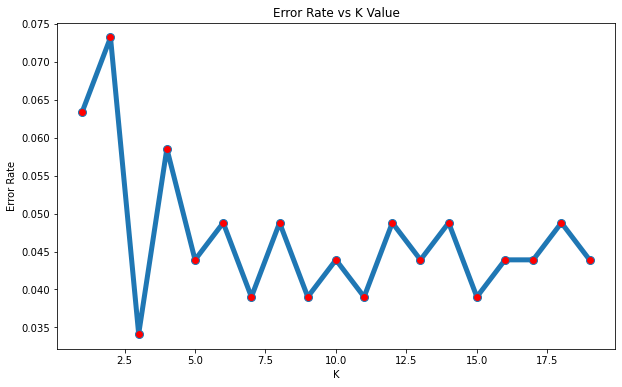

In [31]:
#Plotting error terms for each value of k

plt.figure(figsize=(10,6))
plt.plot(range(1,20), error_rate, linewidth=5, marker='o', markerfacecolor='r', markersize=8)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

According to the plot, the least error term is seen for the model which has a k value of around 3. Therefore, the knn model will be trained with the n_neighbors parameter set to 3 in order to obtain the highest accuracy.

### Building a KNN model

In [34]:
knn = KNeighborsClassifier(n_neighbors=3)

In [36]:
model = knn.fit(x_train,y_train)
model

KNeighborsClassifier(n_neighbors=3)

In [39]:
pred = model.predict(x_test)
pred

array([4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2,
       2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 2,
       2, 2, 4, 4, 4, 2, 2], dtype=int64)

### Model Evaluation

In [41]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [40]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred))
print('\nClassification Report:')
print(classification_report(y_test, pred))

Confusion Matrix:
[[125   2]
 [  5  73]]

Classification Report:
              precision    recall  f1-score   support

           2       0.96      0.98      0.97       127
           4       0.97      0.94      0.95        78

    accuracy                           0.97       205
   macro avg       0.97      0.96      0.96       205
weighted avg       0.97      0.97      0.97       205



In [42]:
knn_acc = accuracy_score(y_test, pred)
print('Accuracy of the KNN Model: ', round(knn_acc * 100, 2), "%")

Accuracy of the KNN Model:  96.59 %


In [49]:
pred2 = model.predict(x_train)
knn_acc2 = accuracy_score(y_train, pred2)
print('Accuracy of the KNN Model (on train data): ', round(knn_acc2 * 100, 2), "%")

Accuracy of the KNN Model (on train data):  97.49 %


**Conclusion:** The KNN model is able to detect whether a patient is diagnosed with benign or malignant cancer with an accuracy of approximately 97%. The accuracy of the model on train data is even higher, which suggests that it not overfitting on test data and is a good fit for real world use cases.